**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
# Down Loading Data Set by link
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'

--2025-01-20 05:41:56--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.58, 18.164.173.18, 18.164.173.110, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.2’

netflix.csv.2       100%[===================>]   3.24M  --.-KB/s    in 0.06s   

2025-01-20 05:41:56 (53.3 MB/s) - ‘netflix.csv.2’ saved [3399671/3399671]



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#
df_original = pd.read_csv('netflix.csv')
df_original.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8704,s8705,Movie,We Belong Together,Chris Stokes,"Charles Malik Whitfield, Draya Michele, Elise ...",United States,"July 16, 2019",2018,TV-14,83 min,Thrillers,A divorced professor shares a night of passion...
6756,s6757,Movie,Fire at Sea,Gianfranco Rosi,"Samuele Caruana, Giuseppe Fragapane","Italy, France","March 21, 2017",2016,TV-14,114 min,"Documentaries, International Movies","Heartbreak, hope and nostalgia collide in this..."
3094,s3095,Movie,The App,Elisa Fuksas,"Vincenzo Crea, Jessica Cressy, Greta Scarano, ...",Italy,"December 26, 2019",2019,TV-MA,79 min,"Dramas, Independent Movies, International Movies","While in Rome to shoot his first movie, actor ..."
1865,s1866,Movie,Phir Hera Pheri,Neeraj Vora,"Akshay Kumar, Sunil Shetty, Paresh Rawal, Bipa...",India,"October 12, 2020",2006,TV-14,150 min,"Comedies, International Movies","Driven by greed, three rich friends seek to do..."
337,s338,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","August 1, 2021",2007,R,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."


In [ ]:
df_original['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
rating_order = {
    'G': 0, 'TV-G': 0, 'TV-Y': 1, 'TV-Y7': 2, 'TV-Y7-FV': 2, 'PG': 3, 'TV-PG': 3,
    'PG-13': 4, 'TV-14': 4, 'TV-MA': 5, 'R': 6, 'NC-17': 5, 'NR': 7, 'UR': 7,
}

Defining Ratings in The Data Set:

> **Common Movie and TV Ratings**


*  **G**(General Audiences): Suitable for all ages. No content that parents would find inappropriate.

*  **PG** (Parental Guidance Suggested): Some material may not be suitable for children. Parents are encouraged to guide their children.

*   **PG-13**: Some material may be inappropriate for children under 13. Includes more mature themes, language, or violence.
*  **R** (Restricted): Restricted to viewers 17 and older unless accompanied by a parent or guardian. Strong adult content.

*  **PG-13**: Some material may be inappropriate for children under 13. Includes more mature themes, language, or violence.
*  **R **(Restricted): Restricted to viewers 17 and older unless accompanied by a parent or guardian. Strong adult content.
*  **NC-17**: No one under 17 is admitted. Explicit adult themes, language, or visuals.
*  **NR** (Not Rated): The movie has not been rated by the relevant classification body.
*  **UR** (Unrated): Similar to NR, meaning no official rating is assigned.

> ***TV Ratings***:-

*  **TV-Y**: Suitable for all children, including very young ones.

*  **TV-Y7**: Directed to older children aged 7 and up.

*  **TV-Y7-FV**: Specifically includes fantasy violence, which may be intense for younger kids.

*  **TV-G**: General audience; suitable for all ages.
*  **TV-PG**: Parental guidance suggested for younger viewers due to mild language, violence, or themes.

*  **TV-14**: Parents strongly cautioned. Not suitable for children under 14 due to more intense content.

*  **TV-MA**: Mature audiences only. Includes explicit language, violence, or sexual content.

Observing Data :
1. Shape
2. Data Types
3. Finding null_Values
4. Statistical Summary

In [ ]:
df_original.shape

(8807, 12)

Data set has originally has 12 columns and 8807 rows of values

In [ ]:
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Insights:**

Data set has 12 columns with 1 int64 type column , 11 object type colums .
There are Two date related columns i.e. Date_added and release_year , duration column can be categorirized into category and ratings too.


In [ ]:
df_original.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Insight:**

Data contains null values in columns director', 'cast', 'country', 'date_added', 'rating', 'duration'.


In [ ]:
df_original.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **Functions**
**note**:
**filtered = df_name**


# **Functions**


1# **Functions**


1. **df & filter_df:**
* explode_and_strip_column(df, column_name)
* calling_df_filter( value,df_name, column_name)

2. **filtering tables & charts & subplot:**


* create_top10_value_count_tables(filtered)

**Tables**

* create_value_count_tables(filtered)
* create_top10_value_count_table(filtered, column_to_analyze)

**Charts**
* create_top10_value_count_charts(filtered)
* create_top10_value_count_chart(filtered, column_to_analyze)

**Subplot**
* create_top10_value_count_subplot(filtered)

**all typpes**

* create_charts_by_relationship(df_name, columns_to_analyze, chart_type)
* (opptional) : plt_create_charts_by_relationship(filtered, columns_to_analyze, chart_type)



**Dataset:**
* Genre_df
* actor_df
* director_df
* country_df


#New columns &  df and filtred_df functions

**Converting  date added and relation between release year and data_added**

* **Use drona() for null values**

In [ ]:
df = df_original.copy()

#Weeks
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y',errors='coerce')
df['week_of_the_year'] = df['date_added'].dt.isocalendar().week

#days gap
df['date_added'] = pd.to_datetime(df['date_added'], format = '%B %d, %Y' , errors = 'coerce')
df['days_gap'] = df['date_added'] - pd.to_datetime(df['release_year'],format = '%Y')
df['days_gap'] = df['days_gap'].dt.days

#months
df['date_added'] = pd.to_datetime(df['date_added'],format='%B %d, %Y', errors='coerce')
df['release_month'] = df['date_added'].dt.month_name()
df = df_original.copy()

#Weeks
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y',errors='coerce')
df['week_of_the_year'] = df['date_added'].dt.isocalendar().week

#days gap
df['date_added'] = pd.to_datetime(df['date_added'], format = '%B %d, %Y' , errors = 'coerce')
df['days_gap'] = df['date_added'] - pd.to_datetime(df['release_year'],format = '%Y')
df['days_gap'] = df['days_gap'].dt.days

#months
df['date_added'] = pd.to_datetime(df['date_added'],format='%B %d, %Y', errors='coerce')
df['release_month'] = df['date_added'].dt.month_name()

#duration_df
#df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int) errors triggered

df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)').iloc[:,0], errors='coerce').astype('Int64')


In [ ]:
def explode_and_strip_column(df, column_name):

  df_name = df.copy()
  df_name[column_name] = df_name[column_name].str.split(',')
  df_name = df_name.explode(column_name)
  df_name[column_name] = df_name[column_name].str.strip()
  return df_name

'''df_name = input('enter the df_name:')
column_name = input('enter the column_name:')
df_name = explode_and_strip_column(globals()[df],df_name, column_name)'''
# new_dfs
country_df= explode_and_strip_column(df, 'country')
genre_df = explode_and_strip_column(df,'listed_in')
director_df = explode_and_strip_column(df,'director')
actor_df = explode_and_strip_column(df,'cast')

In [ ]:
def calling_df_filter( value,df_name, column_name):
  df_new = globals()[df_name]
  filtered_df = df_new[df_new[column_name] == value]
  return filtered_df

'''Value = str(input('enter the value:'))
df_name = input('enter the df_name:')
column_name = input('enter the column_name:')
US = calling_df_filter(Value,df_name,column)'''

# Example usage:
#US = calling_df_filter('genre_df', 'country', 'United States')
#India = calling_df_filter('genre_df', 'country', 'India')
# ... (rest of the countries)
India = calling_df_filter('India', 'genre_df', 'country')
Spain = calling_df_filter('Spain', 'genre_df', 'country')




# One Statement

> Exploded dataset

In [ ]:


movie_counts = movies.groupby('country')['title'].nunique().reset_index()

movie_counts.columns = ['country', 'title_count']

top_countries_movies = movie_counts.sort_values( by='title_count', ascending=False ).head(10).reset_index(drop=True)


print('Top countries in producing Movies :',top_countries_movies)

print()
print()


genre_count = genre_df.groupby('listed_in')['title'].nunique().reset_index()

genre_count.columns = ['Genre', 'title_count']

top_genre = genre_count.sort_values(by='title_count', ascending=False).head(10).reset_index().drop(columns='index')
print()
print()
print(top_genre)
print()
print()



director_count = director_df.groupby('director')['title'].nunique().reset_index()

director_count.columns = ['Director', 'Title_count']

top_directors = director_count.sort_values(by='Title_count', ascending=False).head(10).reset_index().drop(columns='index')


print(top_directors)



actor_counts = actor_df.groupby('cast')['title'].nunique().reset_index()

actor_counts.columns = ['cast', 'title_count']

top_actors = actor_counts.sort_values(by='title_count', ascending=False).head(10).reset_index().drop(columns='index')
print()
print()
print(top_actors)



#filtering based on type
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']


# finding the count of tv shows by grouping monthly to get best month
tv_shows_counts = tv_shows.groupby('release_month')['title'].count().reset_index()
tv_shows_counts.columns = ['release_month', 'tv_show_count']
best_tv_show_month = tv_shows_counts.sort_values(by = 'tv_show_count', ascending = False).head(1).reset_index().drop(columns = 'index')

# finding the count of movies by grouping monthly to get best month
movies_counts = movies.groupby('release_month')['title'].count().reset_index()
movies_counts.columns = ['release_month', 'movie_count']
best_movie_month = movies_counts.sort_values(by = 'movie_count', ascending = False).head(1).reset_index().drop(columns = 'index')

print()
print()
print(f'best_tv-show_month : {best_tv_show_month}')
print(f'best_movie_month: {best_movie_month}')



# filtering and storing movies and tv shows separately
movies = df1[df1['type']== 'Movie']
tv_shows = df1[df1['type']== 'TV Show']


# finding the count of tv shows in each week by grouping to get best week
week_tv_shows = tv_shows.groupby('week_of_the_year')['title'].nunique().reset_index()
week_tv_shows.columns = ['week_of_the_year', 'tv_show_count']
best_week_tv_show = week_tv_shows.sort_values(by='tv_show_count', ascending = False).head(1).reset_index().drop(columns='index')


# finding the the count of movies  in each week by grouping to get best week for movies
movies_count_by_week = movies.groupby('week_of_the_year')['title'].nunique().reset_index()
movies_count_by_week.columns = ['week_of_the_year', 'movie_count']
best_week_movies = movies_count_by_week.sort_values(by='movie_count', ascending=False).head(1).reset_index().drop(columns = 'index')


# print best week for movies and tv_show
print()
print()
print(f'Best week for Movies :{best_week_movies} ')
print(f'Best week for TV Shows :{best_week_tv_show} ')



#converting date added to date format



movies_df = df[df['type'] == 'Movie']

mode_days_gap = movies_df['days_gap'].mode().iloc[0]

median_days_gap = movies_df['days_gap'].median()

averages_days_gap = movies_df['days_gap'].mean()
print()
print()
print(f'best time release a movie is {mode_days_gap} days after release')
print()
print(f'best time release a movie is {median_days_gap} days after release')







Top countries in producing Movies :           country  title_count
0   United States         2058
1           India          893
2  United Kingdom          206
3          Canada          122
4           Spain           97
5           Egypt           92
6         Nigeria           86
7       Indonesia           77
8          Turkey           76
9           Japan           76




                      Genre  title_count
0      International Movies         2752
1                    Dramas         2427
2                  Comedies         1674
3    International TV Shows         1351
4             Documentaries          869
5        Action & Adventure          859
6                 TV Dramas          763
7        Independent Movies          756
8  Children & Family Movies          641
9           Romantic Movies          616


              Director  Title_count
0        Rajiv Chilaka           22
1            Jan Suter           21
2          Raúl Campos           19
3          Suhas Kadav

# **Functions**


1. **df & filter_df:**
* explode_and_strip_column(df, column_name)
* calling_df_filter( value,df_name, column_name)

2. **filtering tables & charts & subplot:**


* create_top10_value_count_tables(filtered)
* create_top10_value_count_charts(filtered)

**Tables**

* create_value_count_tables(filtered)
* create_top10_value_count_tables(df_name)
* create_top10_value_count_table(filtered, column_to_analyze)# **Functions**


1. **df & filter_df:**
* explode_and_strip_column(df, column_name)
* calling_df_filter( value,df_name, column_name)

2. **filtering tables & charts & subplot:**


* create_top10_value_count_tables(filtered)
* create_top10_value_count_charts(filtered)

**Tables**

* create_value_count_tables(filtered)
* create_top10_value_count_table(filtered, column_to_analyze)

# Functions

Non_Graphical Analysis

To get particular data of of column

Q) What are the top listed in Each Column and listed them with their count ?



*   Find for each Category of columns like Type, Country and Year

what are the prediction based on the observasions





Gettiing All Univariate Non_graphical Data:

Getting all values count as requested by Using function



In [ ]:
def create_value_count_tables(filtered):

  cat_col= filtered.columns

  column_cat = ['type','director','country','release_year','rating','duration','listed_in']

  categorical_cols = cat_col.intersection(column_cat)

  for col in categorical_cols:

    '''print(f"Value counts for '{col}'(top 10):")
    print(filtered_type[col].value_counts().nlargest(10))
    print("\n") '''

    value_counts = filtered[col].value_counts().reset_index()
    value_counts.columns = [col, 'Count']
    print(f"Value counts for '{col}':")
    print(value_counts)




Insights :
By Observing the date shown from the dataset we can describe data as :      

Content Type :    
Movies dominated by 6131 than 2676 of Tv shows from the data set.
Mostly Prefered is movies to watch

Directors:
 Rajiv Chilaka, Raúl Campos & Jan Suter, and Marcus Raboy are among the directors as top directors .
 It is also clear that no director given more than 20 films alone.

Country that produced:
 United States and India are the major content producers, with 2818 and 972 titles respectively. it shows the popularity of these countries content globally.

Release Year:
 The majority of content is from recent years (2018, 2017, 2019, 2020), indicating a focus on newer releases.

Rating:
  The most common rating is TV-MA, followed by TV-14, indicating a significant amount of mature content. This might target a broader adult audience.




**Insights**:-

We can see   6131 Movies  and  2676TV Shows produced by different directors. We Identify that US has produced more movies in different Genre with different Distribution.

In the year 2018 most of the movies were release with wide range of movies produced by different countries with various genre combination.

In over all, we can Obsereve that Above 17 years recommended movies released at maximum. also obsereved that no single director produced more 20 alone by combining movie and shows.

In Genre, 362 films are belong to  Dramas, International Movies  having the highest count followinng with  Documentaries at count of  359
third Stand-Up Comedy at count of 334.

Note:
These are all out put of raw information available from the dataset.

We can also filtered data as well better understading excuted above.

In [ ]:
def create_top10_value_count_tables(df_name):
  filtered = df_name
  cat_col= filtered.columns

  column_cat = ['type','director','country','release_year','rating','duration','listed_in']

  categorical_cols = cat_col.intersection(column_cat)

  for col in categorical_cols:
    print(f"Value counts for '{col}' (top10):")
    print(filtered[col].value_counts().nlargest(10))
    print("\n")
    print("\n")
    print(f"Value counts for '{col}' (bottom 10):")
    print(filtered[col].value_counts().nsmallest(10))
    print("\n")

**create_top10_value_count_table(filtered, column_to_analyze)**



In [ ]:
def create_top10_value_count_table(df_name, column_to_analyze):
  filtered = df_name
  cat_col = filtered.columns
  column_cat = ['type', 'director', 'country', 'release_year', 'rating', 'duration', 'listed_in']
  categorical_cols = cat_col.intersection(column_cat)

  # Check if the column_to_analyze is in the DataFrame
  if column_to_analyze not in filtered.columns:
      print(f"Error: Column '{column_to_analyze}' not found in the DataFrame.")
      return  # Exit the function if the column is not found


  # If it's a single column, analyze it
  if column_to_analyze in categorical_cols:
    print(f"Value counts for '{column_to_analyze}' (top 10):")
    filtered[column_to_analyze].value_counts().nlargest(10)
    print(filtered[column_to_analyze].value_counts().nlargest(10))
    print("\n")
    print(f"Value counts for '{column_to_analyze}' (bottom 10):")
    print(filtered[column_to_analyze].value_counts().nsmallest(10))
    print("\n")
  else:
    print(f"Error: Column '{column_to_analyze}' is not a categorical column.")



**create_top10_value_count_tables(filtered):**

As mentoned in Insights of table of this Graphical information  

# Inputs :



In [ ]:
df_name = input("Enter the name of the dataset (e.g., US, India): ")
column_name = input("Enter the name of the column to analyze: ")

if df_name in globals() :
    df = globals()[df_name]

    # Call the function with the dataset and column name
    func_name(df, column_name)
else:
    print(f"Error: dataset '{df_name}' not found.")

KeyboardInterrupt: Interrupted by user

In [ ]:
df_name = input("Enter the name of the DataFrame (e.g., US, India): ")

if df_name in dataframes:
  create_top10_value_count_tables(dataframes[df_name])
else:
  print(f"Error: DataFrame '{df_name}' not found.")

# **Functions**


1. **df & filter_df:**
* explode_and_strip_column(df, column_name)
* calling_df_filter( value,df_name, column_name)

2. **filtering tables & charts & subplot:**


* create_top10_value_count_tables(filtered)

**Tables**

* create_value_count_tables(filtered)
* create_top10_value_count_table(filtered, column_to_analyze)

**Charts**
* create_top10_value_count_charts(filtered)
* create_top10_value_count_chart(filtered, column_to_analyze)

**Subplot**
* create_top10_value_count_subplot(filtered)

**all typpes**

* create_charts_by_relationship(df_name, columns_to_analyze, chart_type)
* (opptional) : plt_create_charts_by_relationship(filtered, columns_to_analyze, chart_type)

# Functional Column to Display

**ColumN Chart**

In [ ]:
def create_top10_value_count_charts(filtered):
  cat_col = filtered.columns
  column_cat = ['type', 'director', 'country', 'release_year', 'rating', 'duration', 'listed_in']
  categorical_cols = cat_col.intersection(column_cat)

  for col in categorical_cols:
    print(f"Value counts for '{col}' (top 10):")

    # Get the top 10 value counts
    top10_counts = filtered[col].value_counts().nlargest(10)

    print(top10_counts)
    print("\n")


    plt.figure(figsize=(10, 6))
    top10_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


**Column Charts to Call**

In [ ]:
def create_top10_value_count_chart(df_name, column_to_analyze):
  cat_col = df_name.columns
  column_cat = ['type', 'director', 'country', 'release_year', 'rating', 'duration', 'listed_in']
  categorical_cols = cat_col.intersection(column_cat)


  if column_to_analyze in categorical_cols:
    print(f"Value counts for '{column_to_analyze}' (top 10):")
    top10_counts = filtered[column_to_analyze].value_counts().nlargest(10)
    print(df_name[column_to_analyze].value_counts().nlargest(10))
    print("\n")
    print(f"Value counts for '{column_to_analyze}' (bottom 10):")
    print(df_name[column_to_analyze].value_counts().nsmallest(10))
    print("\n")


    plt.figure(figsize=(10, 6))
    top10_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
  else:
    print(f"Error: Column '{column_to_analyze}' is not a categorical column.")


  print(f'the data name ')
  plt.tight_layout()
  plt.show()

**Subploting to get charts**

In [ ]:
def create_top10_value_count_subplot(filtered):
  cat_col = filtered.columns
  column_cat = ['type', 'director', 'country', 'release_year', 'rating', 'duration', 'listed_in']
  categorical_cols = cat_col.intersection(column_cat)

  # Calculate the number of rows and columns for subplots
  num_cols = 3
  num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

  # Create the subplots[]
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

  axes = axes.flatten()


  for i, col in enumerate(categorical_cols):
    top10_counts = filtered[col].value_counts().nlargest(10)

    # Plot on the current subplot
    top10_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Top 10 Value Counts for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)


  plt.tight_layout()
  plt.show()

In [ ]:
def create_top10_value_count_table_subplot_(filtered):
  cat_col = filtered.columns
  column_cat = ['type', 'director', 'country', 'release_year', 'rating', 'duration', 'listed_in']
  categorical_cols = cat_col.intersection(column_cat)

  # Calculate the number of rows and columns for subplots
  num_cols = 3
  num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

  # Create the subplots[]
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))

  axes = axes.flatten()


  for i, col in enumerate(categorical_cols):
    print(f"Value counts for '{col}'(top 10):")
    print(filtered[col].value_counts().nlargest(10))
    print("\n")
    print(f"Value counts for '{col}'(bottom 10):")
    print(filtered[col].value_counts().nsmallest(10))
    print("\n")
    top10_counts = filtered[col].value_counts().nlargest(10)

    # Plot on the current subplot
    top10_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Top 10 Value Counts for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)


  plt.tight_layout()
  plt.show()

From the Insights above:

Content Strategy: The platform could focus on acquiring more content from under-represented countries to diversify its catalog.

Audience Targeting: Marketing efforts could be tailored based on the prevalent content types and ratings to reach specific audiences (e.g., promoting mature content to adults, family-friendly content to families).

Trend Analysis: Examining release year trends over time can provide insights into content production and consumption patterns.

Director Performance: Analyzing the popularity and engagement of content from specific directors can inform future collaborations.

Regional Preferences: Comparing content preferences by country can help personalize recommendations and marketing campaign



From the Above Data we Can Build:     

Univariate Analysis:

What is the distribution of year released with the no of films released.


In [ ]:


def plt_create_charts_by_relationship(filtered, columns_to_analyze, chart_type):
    """Creates charts based on the relationship between columns.

    Args:
        filtered: The filtered DataFrame.
        columns_to_analyze: A list of columns to analyze.
        chart_type: The type of chart to create ('bar', 'scatter', 'box', 'violin', 'heatmap').
    """

    if len(columns_to_analyze) == 1:
        # Univariate Analysis
        col = columns_to_analyze[0]
        print(f"Univariate Analysis for '{col}':")

        if chart_type == 'bar':
            filtered[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
            plt.title(f'Top 10 Value Counts for {col}')
        elif chart_type == 'hist':
            plt.hist(filtered[col], bins=20)
            plt.title(f'Histogram of {col}')
        elif chart_type == 'pie':
            filtered[col].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
            plt.title(f'Pie Chart of {col}')
            plt.ylabel('')

        plt.xlabel(col)
        plt.ylabel('Count' if chart_type == 'bar' else 'Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.show()

    elif len(columns_to_analyze) == 2:
        # Bivariate Analysis
        col1, col2 = columns_to_analyze
        print(f"Bivariate Analysis for '{col1}' and '{col2}':")

        if chart_type == 'scatter':
            plt.scatter(filtered[col1], filtered[col2])
            plt.title(f'Scatter Plot of {col1} vs. {col2}')
        elif chart_type == 'box':
            sns.boxplot(x=col1, y=col2, data=filtered)
            plt.title(f'Box Plot of {col2} by {col1}')
        elif chart_type == 'violin':
            sns.violinplot(x=col1, y=col2, data=filtered)
            plt.title(f'Violin Plot of {col2} by {col1}')


        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.xticks(rotation=45, ha='right')
        plt.show()

    elif len(columns_to_analyze) > 2:
        # Multivariate Analysis
        print(f"Multivariate Analysis for {columns_to_analyze}:")

        if chart_type == 'heatmap':
            correlation_matrix = filtered[columns_to_analyze].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
            plt.title('Correlation Matrix Heatmap')
            plt.show()

        elif chart_type == 'correlation':
            correlation_matrix = filtered[columns_to_analyze].corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
            plt.title('Correlation Matrix')
            plt.show()


    else:
        print("Please provide at least one column to analyze.")

In [ ]:
def create_charts_by_relationship(df_name, columns_to_analyze, chart_type):

  plot_list = ['bar','correlation','heatmap','jointplot','kde','violin','box','scatter','kde','pie','hist']
  filtered = df_name
  if chart_type in chart_type:
    """Creates charts based on the relationship between columns.

    Args:
        filtered: The filtered DataFrame.
        columns_to_analyze: A list of columns to analyze.
        chart_type: The type of chart to create ('bar', 'scatter', 'box', 'violin', 'heatmap').
    """
    if len(columns_to_analyze) == 1:
        # Univariate Analysis
        col = columns_to_analyze[0]

        if chart_type == 'bar':
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col, data=filtered, order=filtered[col].value_counts().nlargest(10).index)
            plt.title(f'Top 10 Value Counts for {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.show()

        elif chart_type == 'hist':
            plt.figure(figsize=(10, 6))
            sns.histplot(filtered[col], bins=20)
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

        elif chart_type == 'pie':
            plt.figure(figsize=(8, 8))
            top_values = filtered[col].value_counts().nlargest(10)
            # Create pie chart using Seaborn
            sns.color_palette("husl", 8)
            sns.set_palette("husl",8)
            sns.set_style("white")
            sns.despine()
            sns.set_style("ticks")
            sns.set_context("talk")
            sns.countplot(x=col,data=filtered,order = top_values.index,palette="husl")
            #plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'Pie Chart of {col}')
            #plt.axis('equal')
            plt.show()

        elif chart_type == 'kde':  # Kernel Density Estimation plot
            plt.figure(figsize=(10, 6))
            sns.kdeplot(filtered[col])
            plt.title(f'Kernel Density Estimation of {col}')
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.show()
        elif chart_type == 'dist':
            plt.figure(figsize=(10, 6))
            sns.distplot(df_name[col])
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

    elif len(columns_to_analyze) == 2:
        # Bivariate Analysis
        col1, col2 = columns_to_analyze

        if chart_type == 'scatter':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=col1, y=col2, data=filtered)
            plt.title(f'Scatter Plot of {col1} vs. {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

        elif chart_type == 'box':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=col1, y=col2, data=filtered)
            plt.title(f'Box Plot of {col2} by {col1}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.xticks(rotation=45, ha='right')
            plt.show()

        elif chart_type == 'violin':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            sns.violinplot(x=col1, y=col2, data=filtered)
            plt.title(f'Violin Plot of {col2} by {col1}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.xticks(rotation=45, ha='right')
            plt.show()
        elif chart_type == 'line':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            sns.lineplot(x=col1, y=col2, data=filtered)
            plt.title(f'Line Plot of {col2} vs. {col1}')
            plt.xticks(rotation=45, ha='right')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

        elif chart_type == 'kde':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            sns.kdeplot(x=filtered[col1], y=filtered[col2])
            plt.title(f'Bivariate Kernel Density Estimation of {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.yticks(rotation=45, ha='right')
            plt.show()

        elif chart_type == 'jointplot':  # Joint plot with scatter and histograms
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            sns.jointplot(x=col1, y=col2, data=filtered, kind='scatter')
            plt.title(f'Joint Plot of {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.xticks(rotation=60, ha='right')
            plt.show()
        elif chart_type == 'heatmap':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(10, 6))
            correlation_matrix = filtered[columns_to_analyze].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
            plt.title('Correlation Matrix Heatmap')
            plt.show()
        elif chart_type == 'bar':
            filtered = filtered.drop_duplicates(subset=[col1, col2])
            plt.figure(figsize=(12, 6))
            sns.countplot(x=col1, hue=col2, data=df_name,
                          order=df_name[col1].value_counts().nlargest(10).index)
            plt.title(f'Top 10 Value Counts for {col1} by {col2}')
            plt.xlabel(col1)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=col2)
            plt.show()
        elif chart_type == 'dist':
            plt.figure(figsize=(10, 6))
            sns.kdeplot(x=df_name[col1], y=df_name[col2], fill=True, cmap="Blues", thresh=0)
            plt.title(f'Joint Distribution of {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()
    elif len(columns_to_analyze) > 2:
        # Multivariate Analysis
        print(f"Multivariate Analysis for {columns_to_analyze}:")

        if chart_type == 'heatmap':
            filtered = filtered.drop_duplicates(subset=columns_to_analyze)
            plt.figure(figsize=(10, 6))
            correlation_matrix = filtered[columns_to_analyze].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
            plt.title('Correlation Matrix Heatmap')
            plt.show()

        elif chart_type == 'correlation':
            filtered = filtered.drop_duplicates(subset=columns_to_analyze)
            plt.figure(figsize=(10, 6))
            correlation_matrix = filtered[columns_to_analyze].corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
            plt.title('Correlation Matrix')
            plt.show()


    else:
        print("Please provide at least one column to analyze.")
  else:
    print(f"you have entered wrong type : {chart_type}")


# One Statement

In [ ]:
#country_df
movies = country_df[country_df['type'] == 'Movie']
movie_counts = movies.groupby('country')['title'].nunique().reset_index()
movie_counts.columns = ['country', 'title_count']
top_countries_movies = movie_counts.sort_values( by='title_count', ascending=False ).head(10).reset_index(drop=True)
print('Top countries in producing Movies :',top_countries_movies)

print()
print()

#genre_df
genre_count = genre_df.groupby('listed_in')['title'].nunique().reset_index()
genre_count.columns = ['Genre', 'title_count']
top_genre = genre_count.sort_values(by='title_count', ascending=False).head(10).reset_index().drop(columns='index')
print()
print()
print(top_genre)
print()
print()

#directo_Df
director_df['director'] = director_df['director'].str.strip()
director_count = director_df.groupby('director')['title'].nunique().reset_index()
director_count.columns = ['Director', 'Title_count']
top_directors = director_count.sort_values(by='Title_count', ascending=False).head(10).reset_index().drop(columns='index')
print(top_directors)

# actor_df
actor_counts = actor_df.groupby('cast')['title'].nunique().reset_index()
actor_counts.columns = ['cast', 'title_count']
top_actors = actor_counts.sort_values(by='title_count', ascending=False).head(10).reset_index().drop(columns='index')
print()
print()
print(top_actors)

#best month for TV shows/ movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# finding the count of tv shows by grouping monthly to get
tv_shows_counts = tv_shows.groupby('release_month')['title'].count().reset_index()
tv_shows_counts.columns = ['release_month', 'tv_show_count']
best_tv_show_month = tv_shows_counts.sort_values(by = 'tv_show_count', ascending = False).head(1).reset_index().drop(columns = 'index')

# finding the count of movies by grouping monthly to get best month
movies_counts = movies.groupby('release_month')['title'].count().reset_index()
movies_counts.columns = ['release_month', 'movie_count']
best_movie_month = movies_counts.sort_values(by = 'movie_count', ascending = False).head(1).reset_index().drop(columns = 'index')

print()
print()
print(f'best_tv-show_month : {best_tv_show_month}')
print(f'best_movie_month: {best_movie_month}')

#best week for TV shows/ movies
movies = df1[df1['type']== 'Movie']
tv_shows = df1[df1['type']== 'TV Show']

# finding the count of tv shows in each week by grouping to get best week
week_tv_shows = tv_shows.groupby('week_of_the_year')['title'].nunique().reset_index()
week_tv_shows.columns = ['week_of_the_year', 'tv_show_count']
best_week_tv_show = week_tv_shows.sort_values(by='tv_show_count', ascending = False).head(1).reset_index().drop(columns='index')

# finding the the count of movies  in each week by grouping to get best week for movies
movies_count_by_week = movies.groupby('week_of_the_year')['title'].nunique().reset_index()
movies_count_by_week.columns = ['week_of_the_year', 'movie_count']
best_week_movies = movies_count_by_week.sort_values(by='movie_count', ascending=False).head(1).reset_index().drop(columns = 'index')

# print best week for movies and tv_show
print()
print()
print(f'Best week for Movies :{best_week_movies} ')
print(f'Best week for TV Shows :{best_week_tv_show} ')

# days_gaps
movies_df = df[df['type'] == 'Movie']
mode_days_gap = movies_df['days_gap'].mode().iloc[0]
median_days_gap = movies_df['days_gap'].median()
averages_days_gap = movies_df['days_gap'].mean()
print()
print()
print(f'best time release a movie is {mode_days_gap} days after release')
print()
print(f'best time release a movie is {median_days_gap} days after release')


Top countries in producing Movies :           country  title_count
0   United States         2752
1           India          962
2  United Kingdom          534
3          Canada          319
4          France          303
5         Germany          182
6           Spain          171
7           Japan          119
8           China          114
9          Mexico          111




                      Genre  title_count
0      International Movies         2752
1                    Dramas         2427
2                  Comedies         1674
3    International TV Shows         1351
4             Documentaries          869
5        Action & Adventure          859
6                 TV Dramas          763
7        Independent Movies          756
8  Children & Family Movies          641
9           Romantic Movies          616


              Director  Title_count
0        Rajiv Chilaka           22
1            Jan Suter           21
2          Raúl Campos           19
3          Suhas Kadav

# Findings and Insights


1. **df & filter_df:**
* explode_and_strip_column(df, column_name)
* calling_df_filter( value,df_name, column_name)

2. **filtering tables & charts & subplot:**




**Tables**
* create_top10_value_count_tables(filtered)
* create_value_count_tables(filtered)
* create_top10_value_count_table(filtered, column_to_analyze)

**Charts**
* create_top10_value_count_charts(filtered)
* create_top10_value_count_chart(filtered, column_to_analyze)

**Subplot**
* create_top10_value_count_subplot(filtered)

**all typpes**

* create_charts_by_relationship(df_name, columns_to_analyze, chart_type)
* (opptional) : plt_create_charts_by_relationship(filtered, columns_to_analyze, chart_type)
*plot_list = ['bar','correlation','heatmap','jointplot','kde','violin','box','scatter','kde','pie','hist']

✉
**After overall Basic analysis of the data by trails .
Preapared more meaningful question and data get insights and recommendations.**

In [ ]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_of_the_year,days_gap,release_month,duration_int
3475,s3476,Movie,The Rugrats Movie,"Igor Kovalyov, Norton Virgien","Elizabeth Daily, Christine Cavanaugh, Kath Sou...",United States,2019-10-01,1998,G,81 min,"Children & Family Movies, Comedies","When his baby brother Dil is born, Tommy Pickl...",40,7943.0,October,3


Q.)How does Netflix use what it knows about viewers and content to make decisions about what to offer, how to make it, and who to work with, all while trying to appeal to people worldwide?

Value counts for 'type' (top 10):
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Value counts for 'type' (bottom 10):
type
TV Show    2676
Movie      6131
Name: count, dtype: int64


Value counts for 'country' (top 10):
country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


Value counts for 'country' (bottom 10):
country
Puerto Rico           1
Jamaica               1
Nicaragua             1
Dominican Republic    1
Samoa                 1
Azerbaijan            1
Botswana              1
Vatican City          1
Kazakhstan            1
Liechtenstein         1
Name: count, dtype: int64


Value counts for 'listed_in' (top 10):
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351

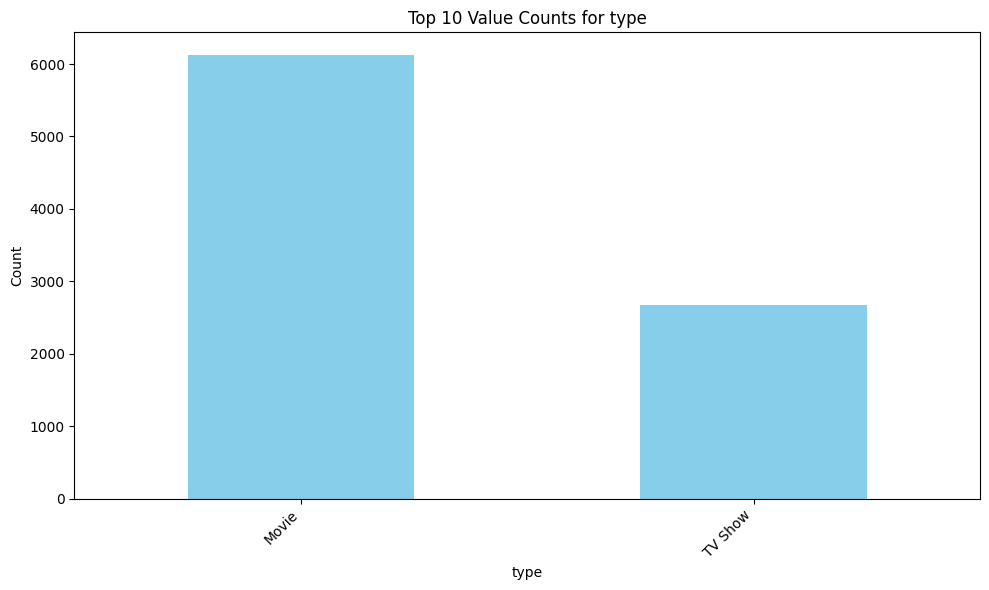

Value counts for 'country'(top 10):
country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


Value counts for 'country'(bottom 10):
country
Puerto Rico           1
Jamaica               1
Nicaragua             1
Dominican Republic    1
Samoa                 1
Azerbaijan            1
Botswana              1
Vatican City          1
Kazakhstan            1
Liechtenstein         1
Name: count, dtype: int64




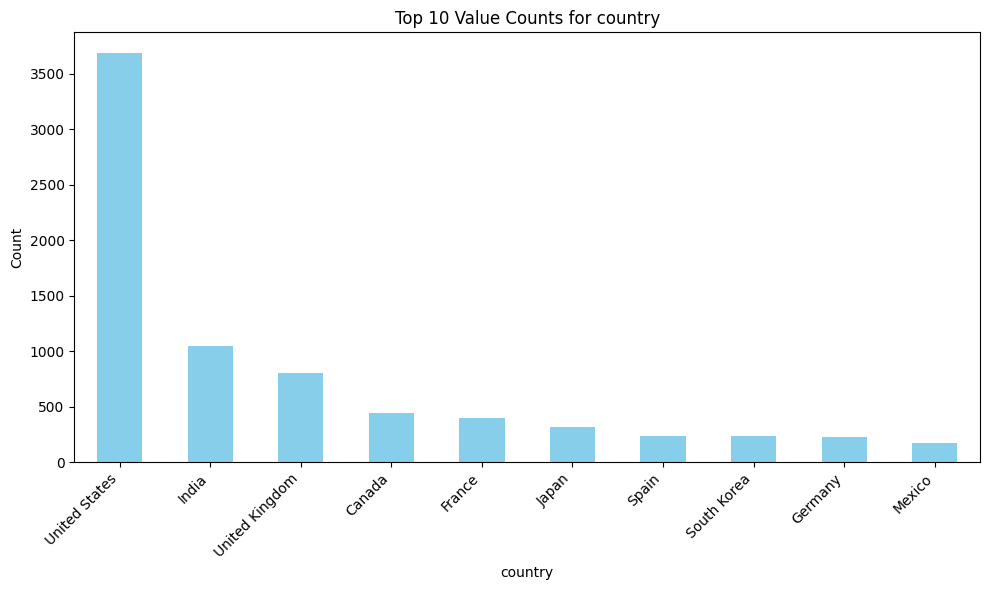

Value counts for 'listed_in'(top 10):
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


Value counts for 'listed_in'(bottom 10):
listed_in
TV Shows                        16
Classic & Cult TV               28
Stand-Up Comedy & Talk Shows    56
TV Thrillers                    57
Movies                          57
Faith & Spirituality            65
Teen TV Shows                   69
Anime Features                  71
Cult Movies                     71
TV Horror                       75
Name: count, dtype: int64




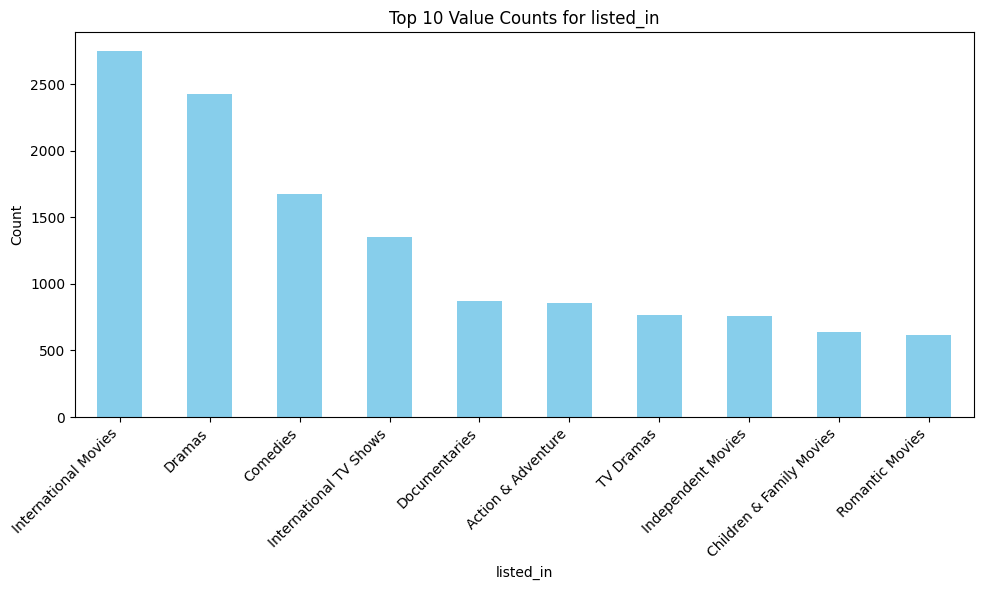

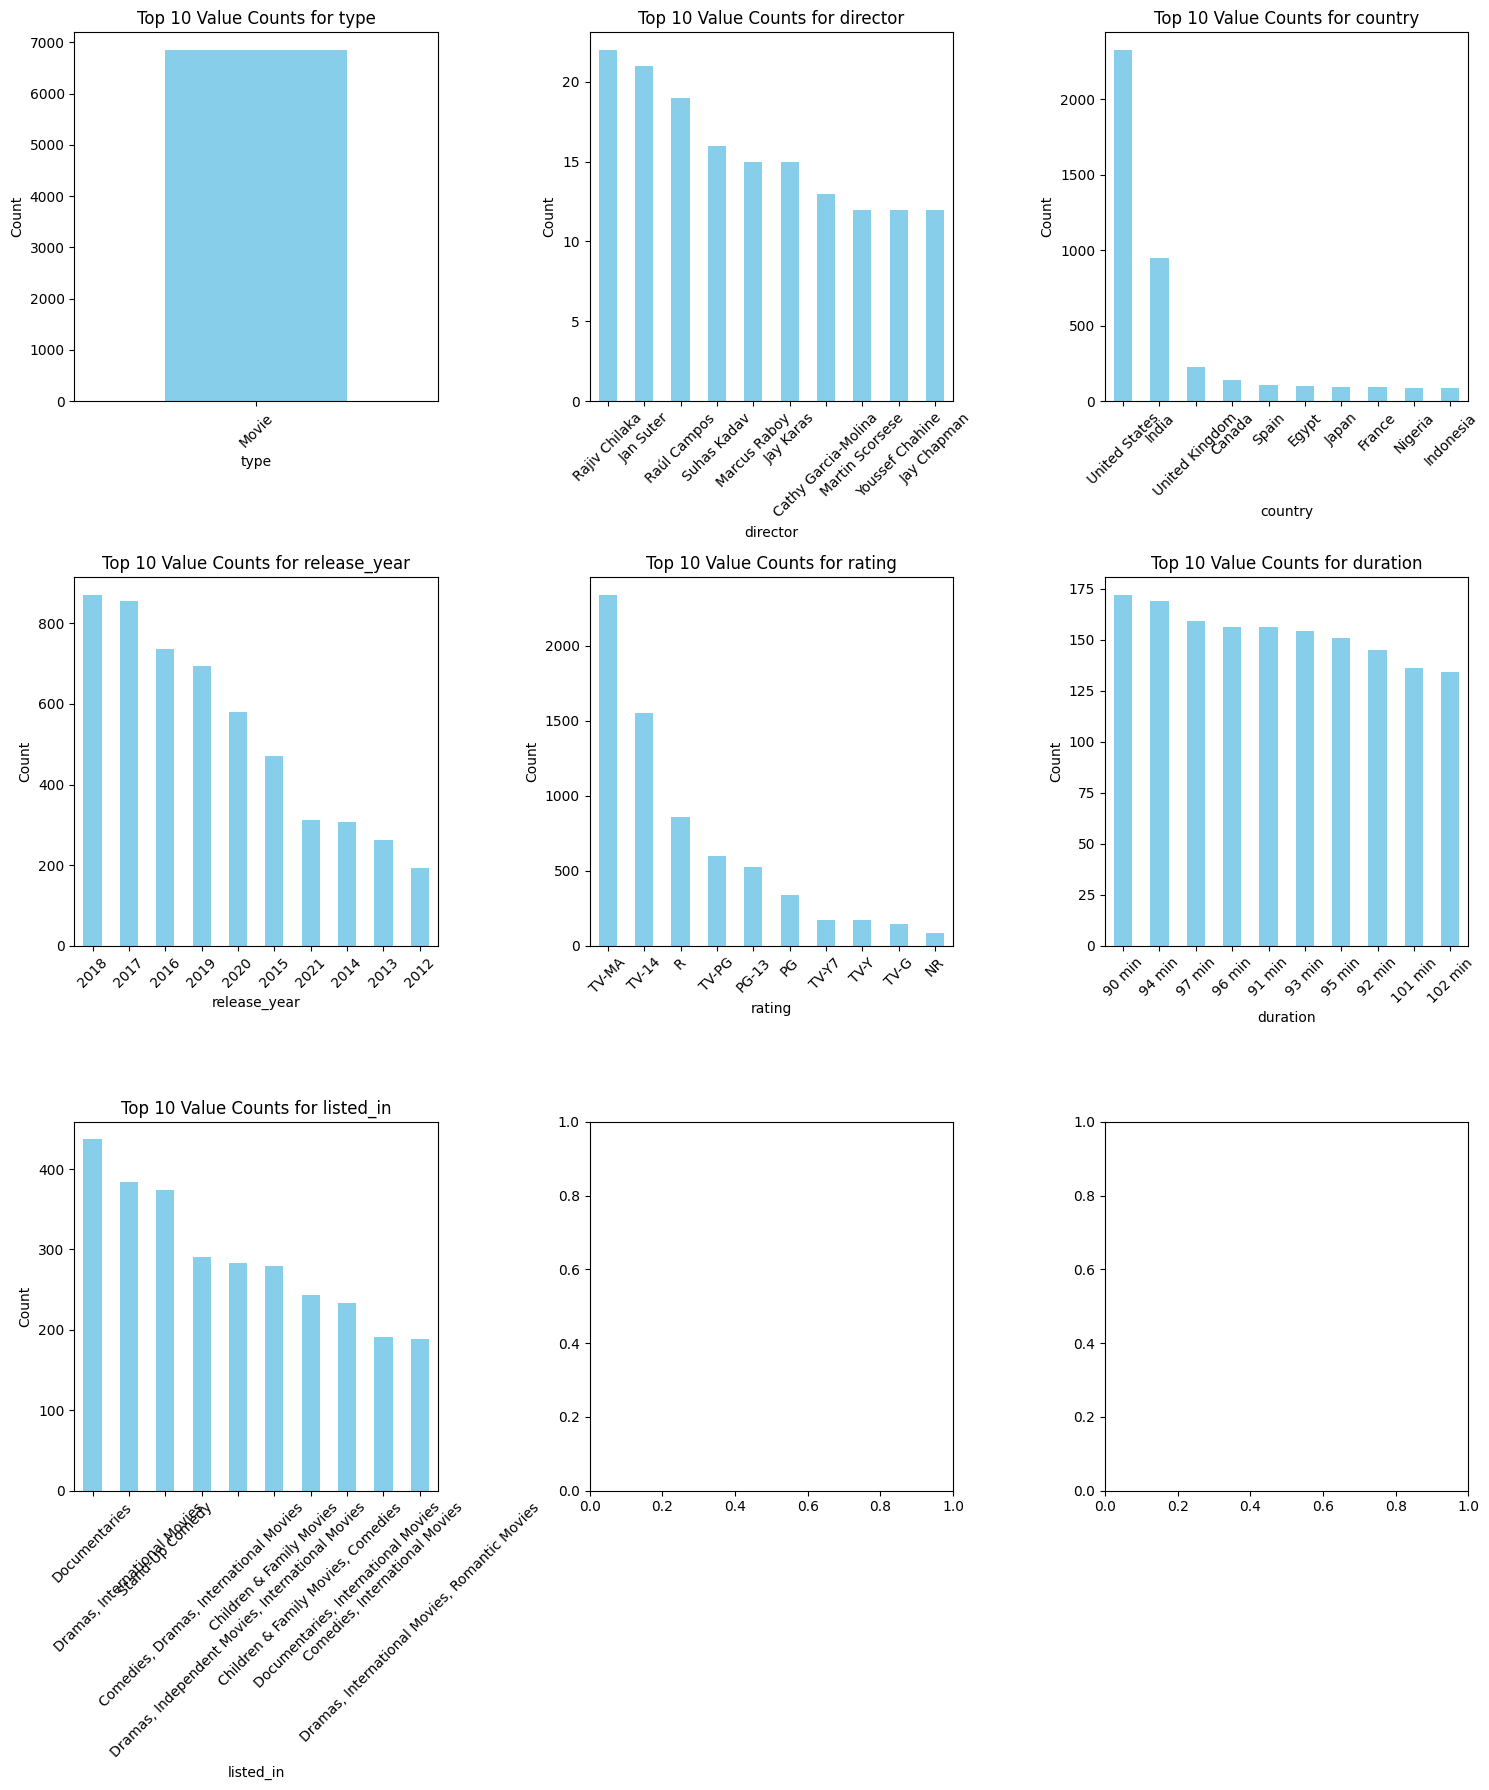

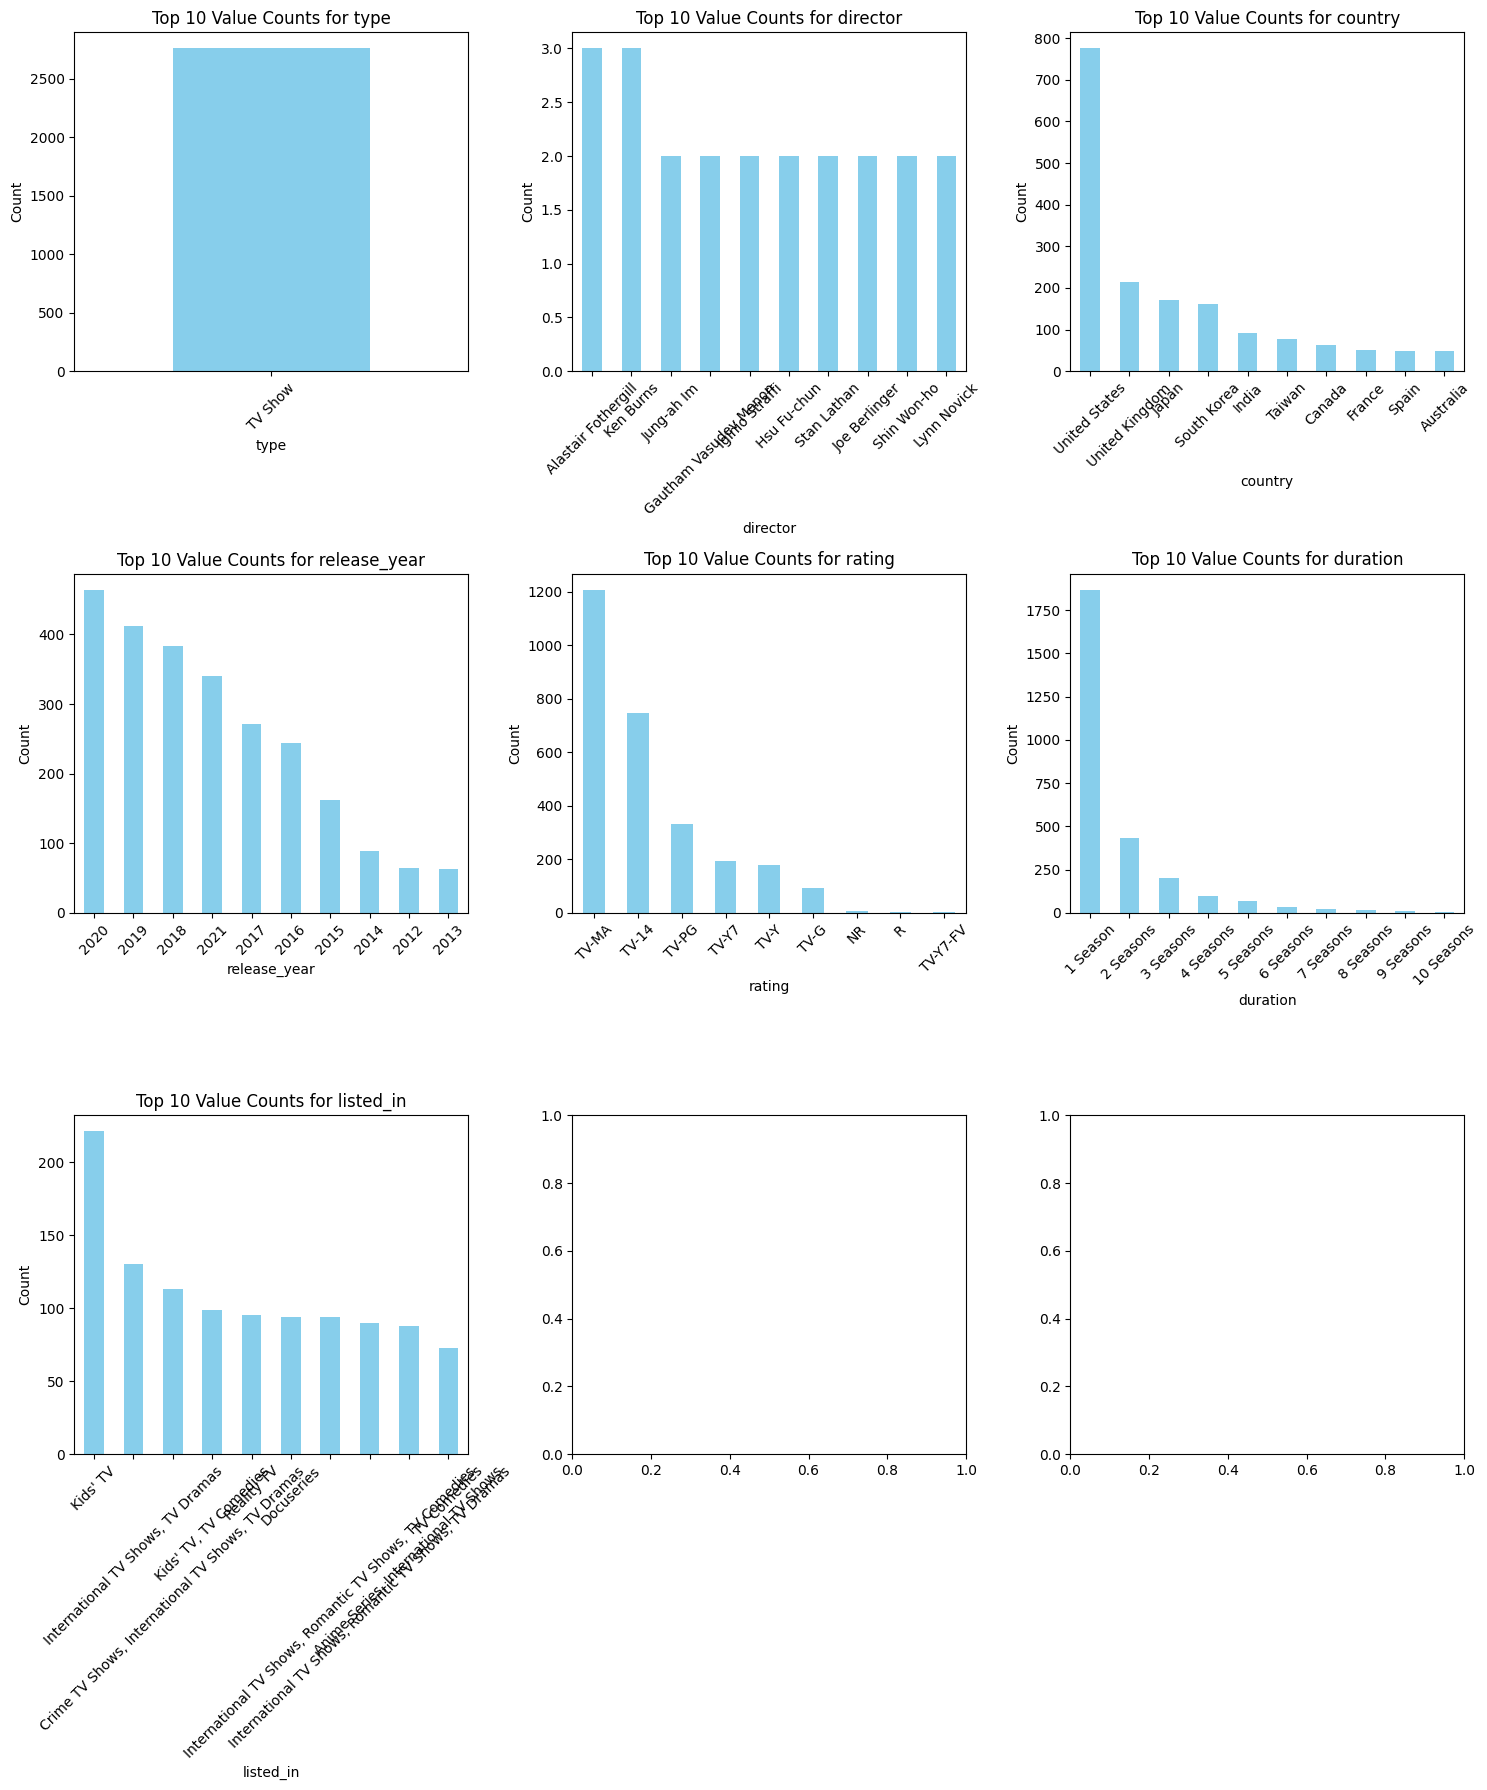

In [ ]:
create_top10_value_count_table(df,'type')
create_top10_value_count_table(country_df,'country')

create_top10_value_count_table(genre_df,'listed_in')
create_top10_value_count_table(director_df,'director')

create_top10_value_count_chart_by_column(df,'type')

create_top10_value_count_chart_by_column(country_df,'country')
create_top10_value_count_chart_by_column(genre_df,'listed_in')
director_movie_df = director_df[director_df['type'] == 'Movie'].copy()
director_tv_df = director_df[director_df['type'] == 'TV Show'].copy()
create_top10_value_count_subplot(director_movie_df)
create_top10_value_count_subplot(director_tv_df)

The ratio of movies to TV shows is: show_id              12.397661
type                 12.397661
title                12.397661
director            171.000000
cast                 12.783439
country              12.480263
date_added           13.677419
release_year         12.397661
rating               12.391813
duration             12.380117
listed_in            12.397661
description          12.397661
week_of_the_year     13.677419
days_gap             13.677419
release_month        13.677419
duration_int         12.397661
dtype: float64


The ratio of movies to TV shows is: 21.365384615384617
The average number of directors for movies is: 1.0
The average number of directors for TV shows is: 1.0


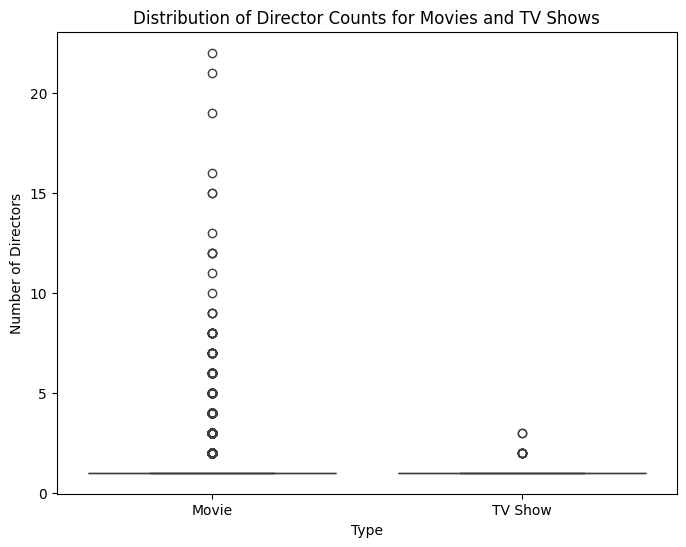

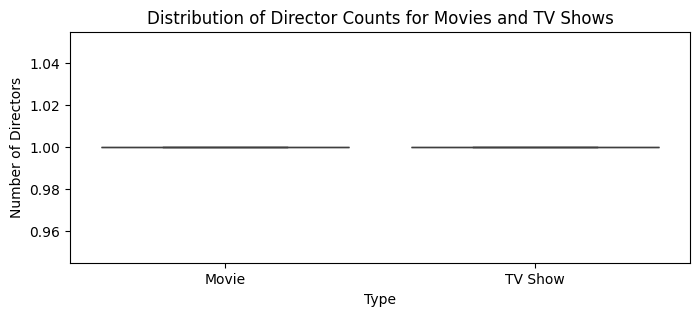

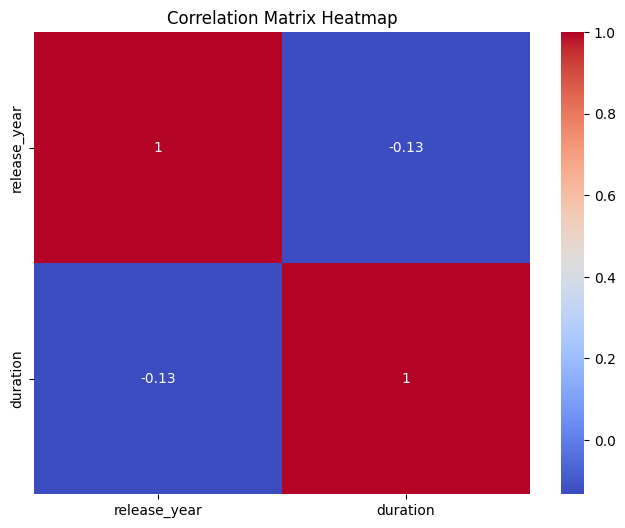

<Figure size 800x600 with 0 Axes>

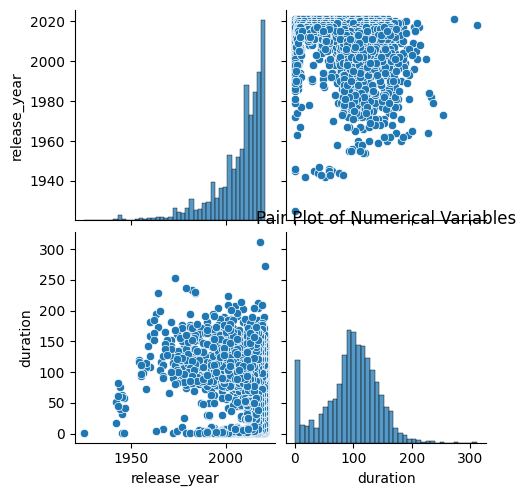

In [ ]:
movie_size = df[df['type'] == 'Movie'].count()
tv_show_size =  df[df['type']=='TV Show'].count()
ratio_movie_tv = movie_size / tv_show_size
print(f"The ratio of movies to TV shows is: {ratio_movie_tv}")
print('\n')

D_movie_size = director_df[director_df['type'] == 'Movie']['director'].count()
D_tv_show_size = director_df[director_df['type']=='TV Show']['director'].count()
ratio_movie_tv = D_movie_size /D_tv_show_size
print(f"The ratio of movies to TV shows is: {ratio_movie_tv}")

director_movie_df = director_df[director_df['type'] == 'Movie']['director'].value_counts().median()
director_tv_df = director_df[director_df['type'] == 'TV Show']['director'].value_counts().median()

print(f"The average number of directors for movies is: {director_movie_df}")
print(f"The average number of directors for TV shows is: {director_tv_df}")

# Create a list of data for movies and TV shows
movie_director_counts = director_df[director_df['type'] == 'Movie']['director'].value_counts().tolist()
tv_show_director_counts = director_df[director_df['type'] == 'TV Show']['director'].value_counts().tolist()

# Create a DataFrame for the box plot
data_for_boxplot = pd.DataFrame({
    'Type': ['Movie'] * len(movie_director_counts) + ['TV Show'] * len(tv_show_director_counts),
    'Director Count': movie_director_counts + tv_show_director_counts
})
# --- Outlier Removal using IQR ---
Q1 = data_for_boxplot['Director Count'].quantile(0.25)
Q3 = data_for_boxplot['Director Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
filtered_data = data_for_boxplot[(data_for_boxplot['Director Count'] >= lower_bound) & (data_for_boxplot['Director Count'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Director Count', data = data_for_boxplot)
plt.title('Distribution of Director Counts for Movies and TV Shows')
plt.ylabel('Number of Directors')
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x='Type', y='Director Count', data=filtered_data)
plt.title('Distribution of Director Counts for Movies and TV Shows')
plt.ylabel('Number of Directors')
plt.show()


numerical_cols = ['release_year', 'duration']
correlation_matrix = df[numerical_cols].dropna().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

df.drop_duplicates(subset=numerical_cols, inplace=True)
plt.figure(figsize=(8, 6))
sns.pairplot(df[numerical_cols])
plt.title('Pair Plot of Numerical Variables')
plt.show()

create_top10_value_count_chart

From the above data we easily say most of the shows on netflix are movies. On observig most of them are from international movies. followed by Dramas. If we notice the trend recently most of international TV shows in high number which are encouraged by most of the recent watchers. Even most popularly kids_shows are listed.

Both Tvshows and movies dominatly produced by US.
Movies are dominatedly produced by US , India , UK, Canada. While TV_shows are produced by US, UK, Japan, South Korea,India and so on.

Movies are produced in 118 countries contributing to reach more audience and viewers. while Tv_Shows are produced by half of the no.of Movies produced country.
Most of the movies belong to above 90 minutes to 100 minutes.while Tv shows are belong to only season 1 followed by season 2 .

Top Rating movies are on both are above 14 age and mature Adult.

Trend of watching Tv shows in increased than Movies and reaching count of movies on Netflix.

Movie director are directing around 10-20 as most most by director but when its comes to median its all 1.
Tv shows director are directing around 1-3 as most most by director but when its comes to median its all 1.

But when notice ration of directors of movies against tv shows they are 21 times more director of movies than Tv shows . but rest are at 2 times. of the data.


* **Content Dominance and Genre Preferences:**

**Movies over TV Shows**:

Your observation that Netflix predominantly hosts movies aligns with the general trend in streaming services. Movies often require less commitment from viewers than TV shows, making them a popular choice for casual viewing.

**International Movies and Dramas:**

The popularity of international movies and dramas likely reflects Netflix's efforts to cater to a global audience. By offering content from diverse regions, they attract viewers with varying preferences and cultural backgrounds.
**Kids' Content:**

The popularity of kids' shows is understandable given the large family audience Netflix targets. This segment is crucial for subscriber retention and engagement.

* **Production Trends:**

**US Dominance:** The US being a major producer for both movies and TV shows isn't surprising, given the size and influence of its entertainment industry. However, it's worth noting the increasing contributions from countries like India, UK, Japan, and South Korea, indicating a shift toward global content creation.

**Wider Reach of Movies:**

Movies being produced in more countries than TV shows could be attributed to factors like production costs and distribution models. TV shows often require longer-term investments and might involve more complex licensing agreements.
**Duration:**

The typical duration of movies (90-100 minutes) aligns with traditional cinema viewing habits. TV shows, on the other hand, exhibit more variability, with season lengths and episode durations influencing overall viewing time.


* **Audience and Ratings:**

**Mature Content:**

The popularity of content rated for audiences above 14 or mature adults could reflect the platform's targeting of a broader demographic. This strategy allows Netflix to capture a wider range of viewers and offer more diverse content.

**TV Show Growth:**
The trend of TV shows gaining popularity could be attributed to the rise of binge-watching culture. TV shows offer ongoing storylines and character development, keeping viewers engaged over extended periods.

* **Director Analysis:**

**Movie Directors:** The higher number of directors associated with movies compared to TV shows could stem from the shorter production timelines and greater creative autonomy typically associated with movies.
Median Director: Both Movies and TV Shows have the same median number for Directors. This may be due to the majority of movies having around the same amount of directors as TV Shows.

**Overall Implications:**

Global Content Strategy: Netflix is clearly focused on providing diverse content from various countries to appeal to its international subscriber base. This strategy is evident in the increasing representation of international movies and TV shows.
Audience Segmentation: Netflix carefully considers the preferences of different age groups and demographics, evident in the ratings and variety of content offered.
Content Scheduling: The trend of TV shows gaining traction could influence Netflix's content scheduling and release strategies. They might consider prioritizing the production and acquisition of TV shows to cater to evolving viewer habits

Q.) How does Netflix decide between getting new movies and shows right away versus focusing on creating its own unique content and offering a wide variety of options from around the world?

<ipython-input-363-fa51af3d1183>:59: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_name[col])


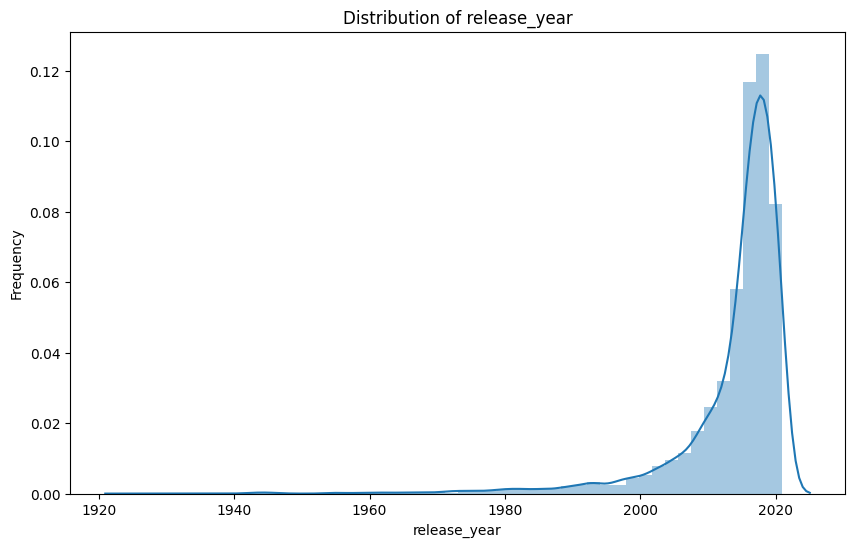

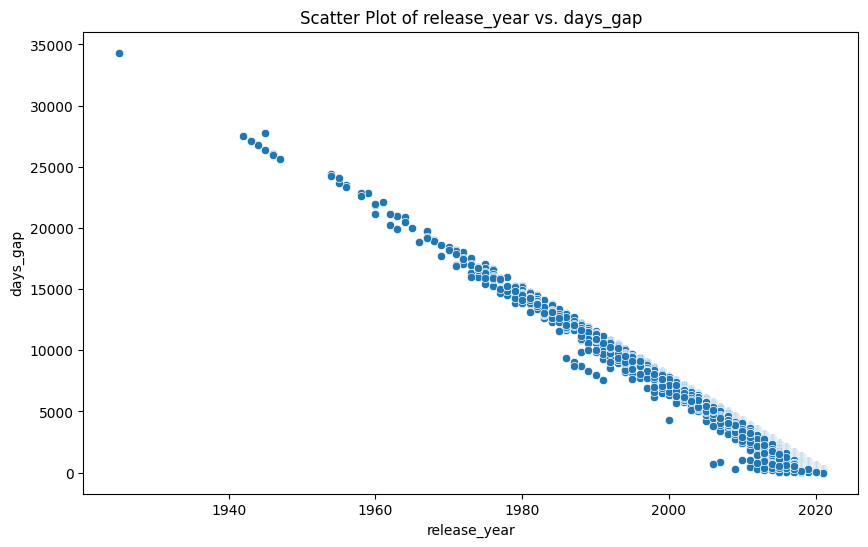

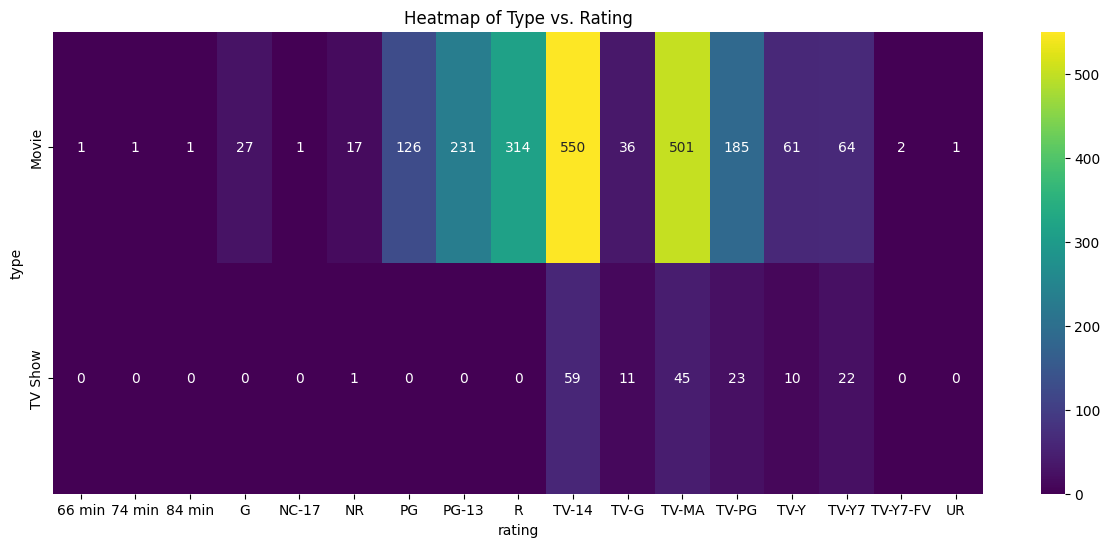

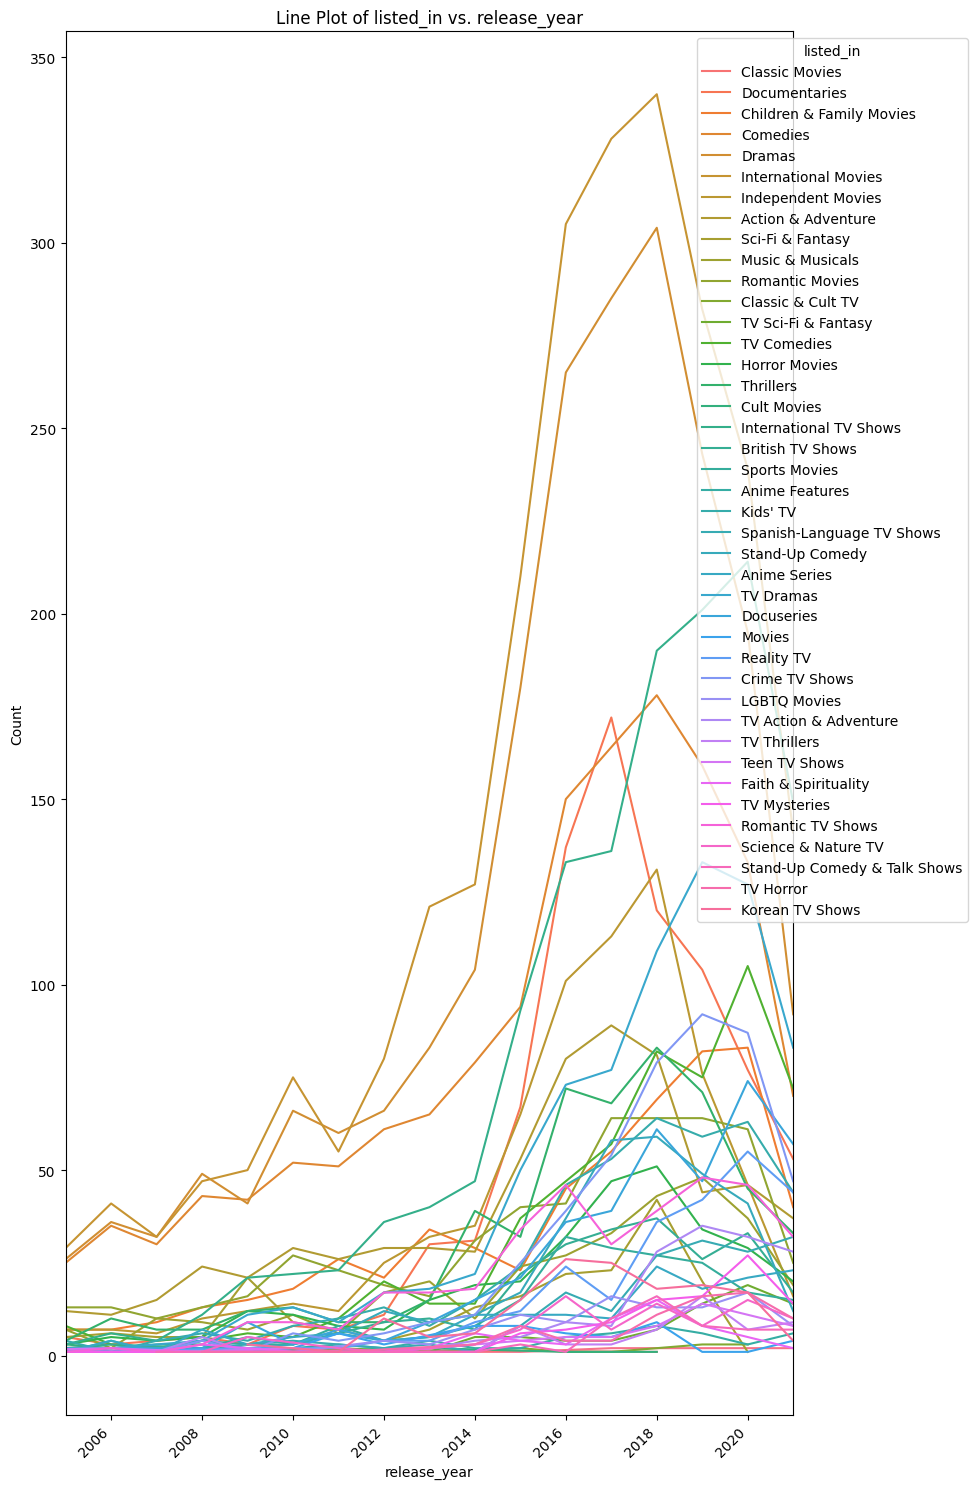

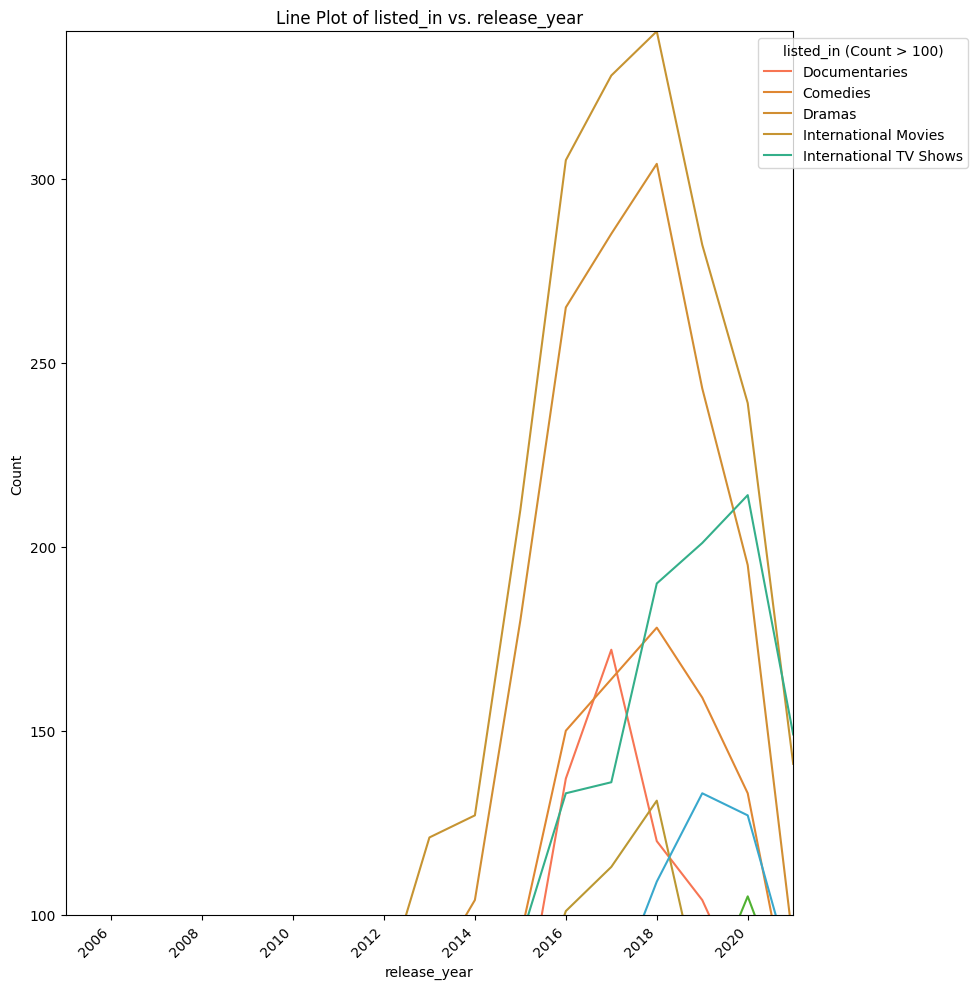

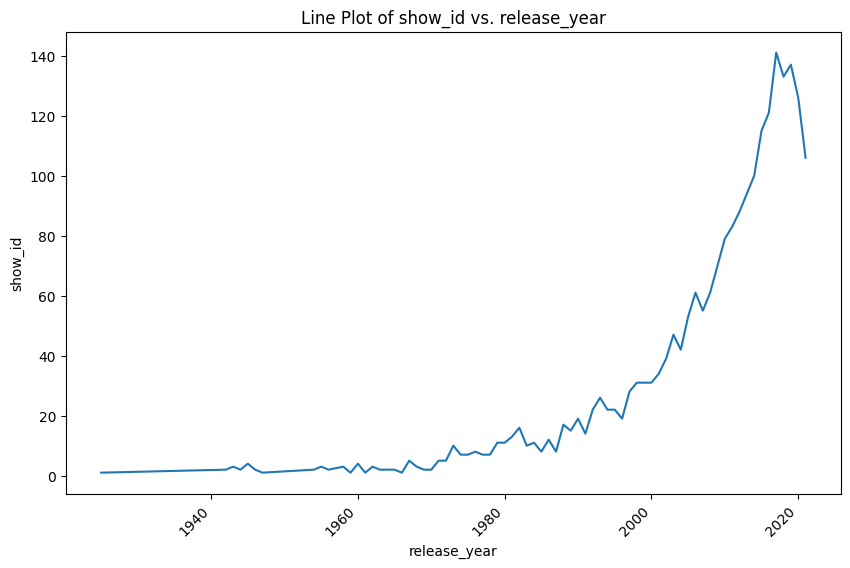

In [ ]:
create_charts_by_relationship(country_df,['release_year'] , 'dist')
create_charts_by_relationship(df, ['release_year','days_gap'], 'scatter')


contingency_table = pd.crosstab(df['type'], df['rating'])
plt.figure(figsize=(15, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')  # fmt='d' for integer values
plt.title('Heatmap of Type vs. Rating')
plt.show()


line_data = genre_df.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
plt.figure(figsize=(10, 15))
ax = sns.lineplot(x='release_year', y='count', hue='listed_in', data=line_data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='listed_in', loc='upper right', bbox_to_anchor=(1.25, 1))
ax.set_xlim(2005, line_data['release_year'].max())
plt.title('Line Plot of listed_in vs. release_year')
plt.xlabel('release_year')
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 10))
filtered_line_data = line_data[line_data['count'] > 150]
ax_y = sns.lineplot(x='release_year', y='count', hue='listed_in', data=line_data)
handles, labels = ax_y.get_legend_handles_labels()
filtered_handles = [h for h, l in zip(handles[1:], labels[1:]) if l in filtered_line_data['listed_in'].unique()]
filtered_labels = [l for l in labels[1:] if l in filtered_line_data['listed_in'].unique()]
ax_y.legend(handles=filtered_handles, labels=filtered_labels, title='listed_in (Count > 100)', loc='upper right', bbox_to_anchor=(1.25, 1))
ax_y.set_xlim(2005, line_data['release_year'].max())
ax_y.set_ylim(100, line_data['count'].max())
plt.title('Line Plot of listed_in vs. release_year')
plt.xlabel('release_year')
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


release_year_counts = df.groupby('release_year')['show_id'].count().reset_index()
create_charts_by_relationship(release_year_counts, ['release_year','show_id'], 'line')

Insights:

**Faster Content Acquisition**

Netflix is actively reducing the "days gap" between content release and platform addition, indicating a strategic focus on providing viewers with fresh content quickly.

**Shifting Content Mix:**

The increase in show additions alongside a shorter "days gap" suggests a potential shift towards original productions and more favorable licensing agreements, allowing for quicker access to new releases.

**Global Content Demand:**

The sustained popularity of international movies and dramas underscores Netflix's global reach and viewer demand for diverse content beyond US productions.'

**Genre Preferences:**

The prevalence of specific genres like international movies and dramas highlights the need for Netflix to understand regional variations in content demand and personalize recommendations accordingly.

**Production Implications:**
While prioritizing faster acquisitions benefits viewers with fresh content, it's essential to balance this strategy with investments in original content development and resource allocation for production teams.

Strategic Insights: Netflix can leverage data-driven insights about "days gap," genre trends, and audience preferences to optimize content acquisition, tailor recommendations, and make strategic decisions for continued platform growth.

> Additional reference:


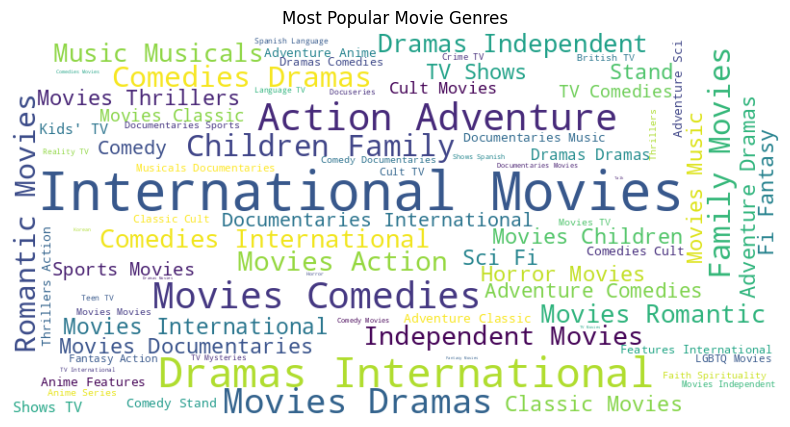

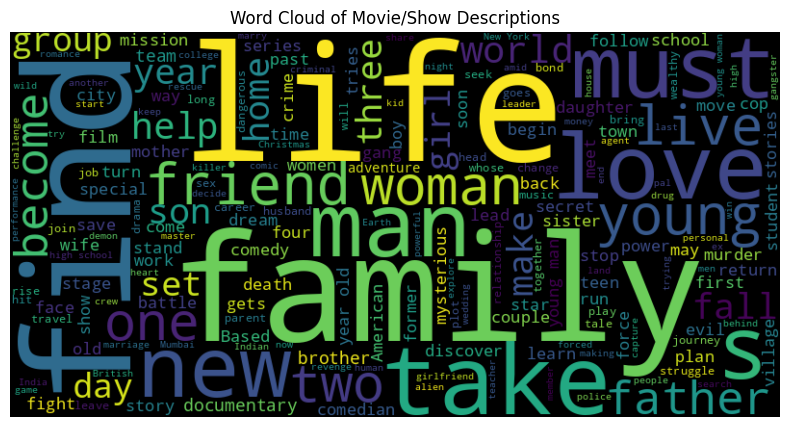

In [ ]:
from wordcloud import WordCloud, STOPWORDS


Genre_df= df.copy()

all_genres = ' '.join(df['listed_in'].astype(str).tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Movie Genres')
plt.show()



# Combine all descriptions into a single string
all_descriptions = ' '.join(df['description'].astype(str))

    # Create the word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(all_descriptions)

    # Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie/Show Descriptions')

plt.show()

Q.)Considering the popularity of International Movies and Dramas, which countries contribute the most content to Netflix, and how does this impact the types of shows and movies available to viewers worldwide?

* **Production Insights:**


**Dominant Content Producers:**

The United States and India are the major content producers, contributing significantly to Netflix's library. This indicates a strategic focus on these markets for content acquisition and original productions.

**International Focus:**

The popularity of "International Movies" and "International TV Shows" as genres suggests a strong emphasis on catering to a global audience by offering diverse content beyond US productions.

* **Genre Preferences:**

**Popular Genres:**

Dramas, comedies, and international movies are among the most prevalent genres, indicating strong viewer preference for these categories.

**Niche Genres:** Documentaries, action & adventure, independent movies, and children & family movies also hold a significant presence, highlighting Netflix's efforts to cater to a wide range of tastes.

* **Talent Insights:**

**Prolific Directors:**

Rajiv Chilaka, Jan Suter, and Raúl Campos are among the most prolific directors on Netflix, suggesting successful collaborations and potential for future projects.

**Popular Cast:** Anupam Kher, Shah Rukh Khan, and Julie Tejwani are among the most frequently featured cast members, indicating their popularity and potential draw for viewers.

**Release Patterns:**

**Peak Release Periods:** '

July emerges as the most popular month for both TV show and movie releases, suggesting a strategic focus on this period to maximize viewership.

**Optimal Release Timing:**
For movies, a "days gap" of approximately 334 days after theatrical release appears to be a common strategy, potentially balancing theatrical windows with streaming availability.

**Weekly Trends:**

The first week of the year and the 27th week see a higher volume of movie and TV show releases, respectively, indicating strategic scheduling to coincide with viewer demand or seasonal trends.

# Final Insights and Reccommenadations

Netflix Content Strategy: A Summary of Insights

Netflix's success hinges on a data-driven content strategy that caters to a diverse, global audience. The platform prioritizes content from the United States and India, reflecting their production capabilities and market size. This is complemented by a strong focus on international movies and TV shows, aligning with Netflix's global expansion and viewers' desire for diverse content.

Dramas, comedies, and international movies dominate genre preferences, indicating their broad appeal. Netflix also offers a range of niche genres, catering to a variety of tastes. Prolific directors like Rajiv Chilaka and Jan Suter, along with popular actors like Anupam Kher and Shah Rukh Khan, play a crucial role in attracting and engaging viewers.

Netflix strategically schedules releases, with July being a peak month for both TV shows and movies. For movies, a "days gap" of around 334 days after theatrical release is common, balancing theatrical windows with streaming availability. Weekly trends show increased movie releases in the first week of the year and TV show releases during the 27th week.

Overall, Netflix leverages data insights about production trends, genre preferences, and talent popularity to inform its content acquisition, development, and release strategies. This data-driven approach allows Netflix to continuously refine its offerings and maintain its position as a leading streaming service, catering to a global audience with diverse tastes.

This summary provides a concise overview of the key observations and insights drawn from the provided data. It highlights Netflix's strategic focus on production sources, genre preferences, talent acquisition, and release patterns, all while prioritizing a diverse and global audience.

# Reccomendations:   

**Recommendations for Netflix's Content Strategy**

1. **Diversify Content Acquisition and Production:**

While the United States and India remain crucial content sources, Netflix should further diversify its acquisition and production efforts to encompass a wider range of countries and cultures. This will not only cater to the growing demand for international content but also provide unique and authentic stories that resonate with diverse global audiences. Exploring emerging markets with strong storytelling traditions, such as South Korea, Brazil, and Nigeria, could unlock new content opportunities and expand Netflix's global reach.

2. Prioritize Original Content Development:

Original productions have been a key driver of Netflix's success, and continued investment in this area is crucial for long-term growth. Netflix should prioritize developing original content across various genres, including international stories, documentaries, and niche genres that cater to specific audience segments. This will not only differentiate Netflix from competitors but also provide viewers with exclusive content they can't find elsewhere.

3. Enhance Content Personalization and Discovery:

Netflix's recommendation engine plays a crucial role in guiding viewers to content they'll enjoy. However, further enhancements are needed to improve content personalization and discovery. Leveraging data insights about viewer preferences, watch history, and regional trends, Netflix can tailor recommendations to individual tastes and ensure viewers easily discover relevant content within the vast library. Implementing features like advanced search filters, curated collections, and personalized watchlists can further enhance the user experience.

4. Foster Talent Relationships and Development:

Recognizing the importance of talent in content creation, Netflix should continue to foster strong relationships with established directors, actors, and writers while also nurturing emerging talent. This can involve providing mentorship opportunities, investing in talent development programs, and collaborating with diverse creators from around the world. By supporting talent, Netflix can ensure a pipeline of fresh and engaging content for its platform.

5. Optimize Release Strategies and Timing:

Strategic scheduling of content releases is crucial for maximizing viewership and engagement. Netflix should continue to analyze data on viewer habits, seasonal trends, and competitive landscape to optimize release strategies. This might involve experimenting with different release windows, exploring alternative release formats like weekly episodes for certain shows, and personalizing release recommendations based on viewer preferences.

6. Expand Interactive and Immersive Content:

Interactive and immersive content formats, such as interactive movies and virtual reality experiences, represent an emerging frontier in entertainment. Netflix should explore and invest in these formats to provide viewers with novel and engaging ways to interact with content. This could involve partnering with technology companies, developing interactive storytelling tools, and experimenting with new forms of content creation and distribution.

7. Strengthen Localization and Accessibility:

To truly cater to a global audience, Netflix should prioritize localization and accessibility efforts. This includes offering content in multiple languages, providing subtitles and dubbing options, and ensuring accessibility features for viewers with disabilities. By making content accessible to a wider audience, Netflix can foster inclusivity and enhance its global appeal.

8. Continuously Monitor and Adapt:

The streaming landscape is constantly evolving, and Netflix must remain agile and responsive to changing viewer preferences and competitive dynamics. Continuous monitoring of data, audience feedback, and industry trends is essential for making informed decisions and adapting strategies as needed. This iterative approach will ensure Netflix remains at the forefront of the streaming revolution.

Note :
**Paraphrased the data using different to tools to make more relavant data.**